Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

data

###### 1. loading and reviewing the data

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', df.shape[1]+1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA

###### 1. basic data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
for col in list(df.columns):
    if col == "customerID":
        continue
    print(col, " -- ", df[col].unique())

gender  --  ['Female' 'Male']
SeniorCitizen  --  [0 1]
Partner  --  ['Yes' 'No']
Dependents  --  ['No' 'Yes']
tenure  --  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService  --  ['No' 'Yes']
MultipleLines  --  ['No phone service' 'No' 'Yes']
InternetService  --  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  --  ['No' 'Yes' 'No internet service']
OnlineBackup  --  ['Yes' 'No' 'No internet service']
DeviceProtection  --  ['No' 'Yes' 'No internet service']
TechSupport  --  ['No' 'Yes' 'No internet service']
StreamingTV  --  ['No' 'Yes' 'No internet service']
StreamingMovies  --  ['No' 'Yes' 'No internet service']
Contract  --  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  --  ['Yes' 'No']
PaymentMethod  --  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

###### 2. summary stats for data

###### for numerical variables

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


###### for categorical variables

In [6]:
df.describe(exclude="number")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


From the information above, we understand that we have 19 features with one target feature (Churn). The dataset contains 7043 rows, and most datasets are categorical.

###### 3. missing data check

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Our dataset does not contain missing data, so we don’t need to perform any missing data treatment activity.

###### 4. imbalance case check

In [8]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

###### 5. Distribution for features

In [9]:
df["TotalCharges"] = df["TotalCharges"].replace("", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

df["SeniorCitizen"] = df["SeniorCitizen"].astype("str")

df["ChurnTarget"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

###### for numerical features

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

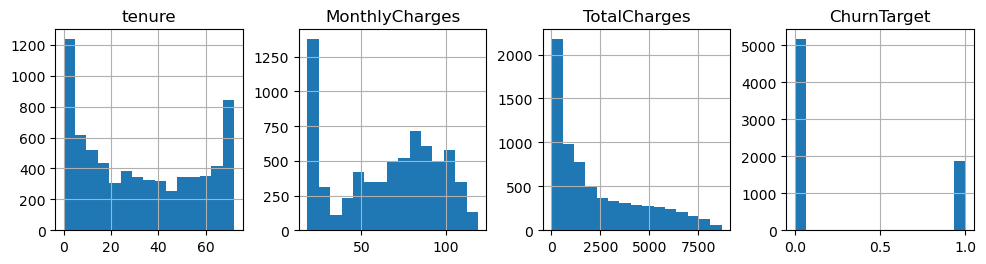

In [10]:
num_features = df.select_dtypes("number").columns
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

###### for categorical features

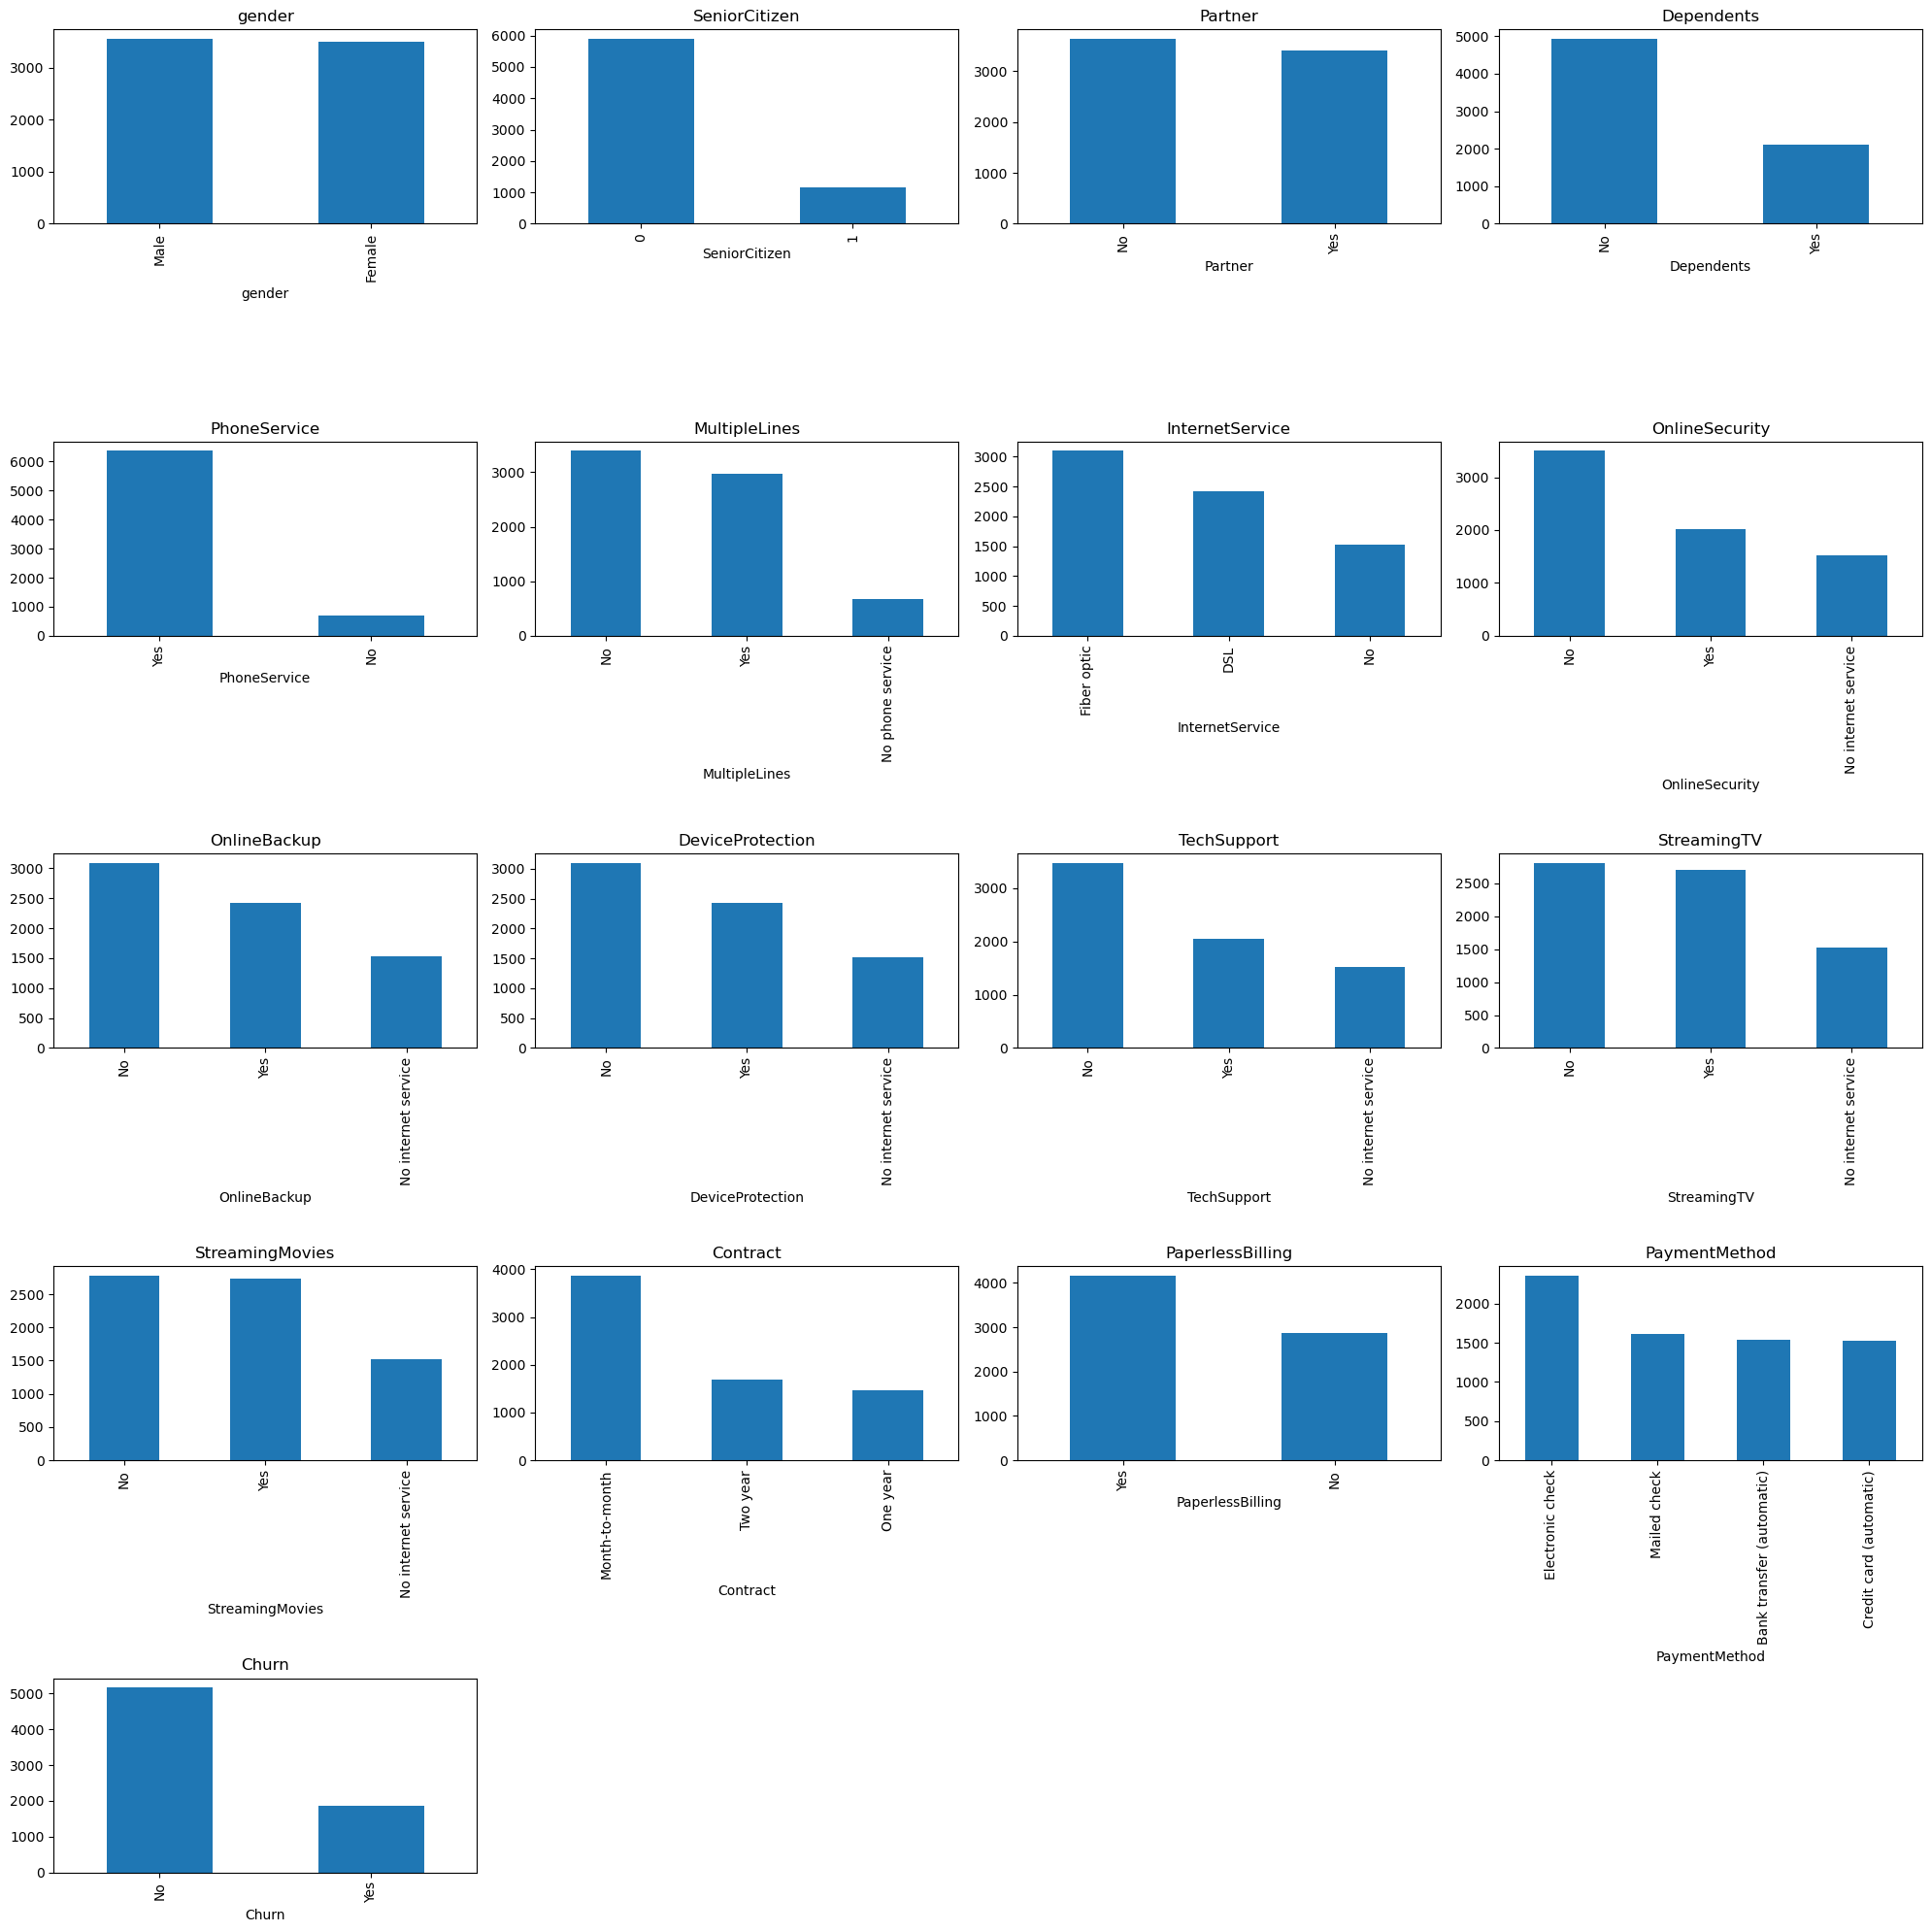

In [11]:
cat_features = df.drop("customerID", axis=1).select_dtypes("object").columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    df[col].value_counts().plot(kind="bar")
    plt.title(col)
    
plt.tight_layout()

###### 6. Correlation

###### for numerical features

Text(0.5, 1.0, 'Correlation heatmap')

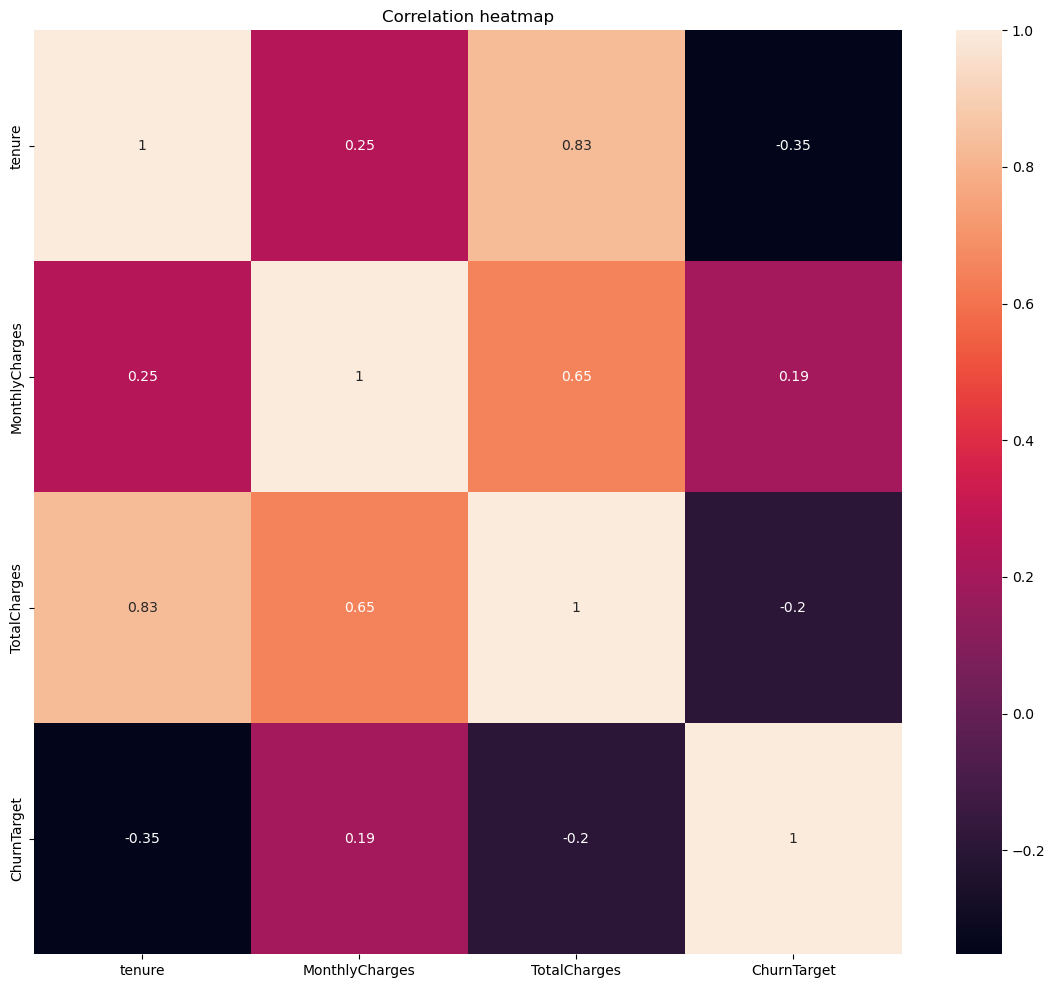

In [12]:
plt.figure(figsize=(14, 12))
sns.heatmap(df[num_features].corr(), annot=True)
plt.title("Correlation heatmap")

Above is based on Pearson Correlation

###### for categorical features

<Axes: >

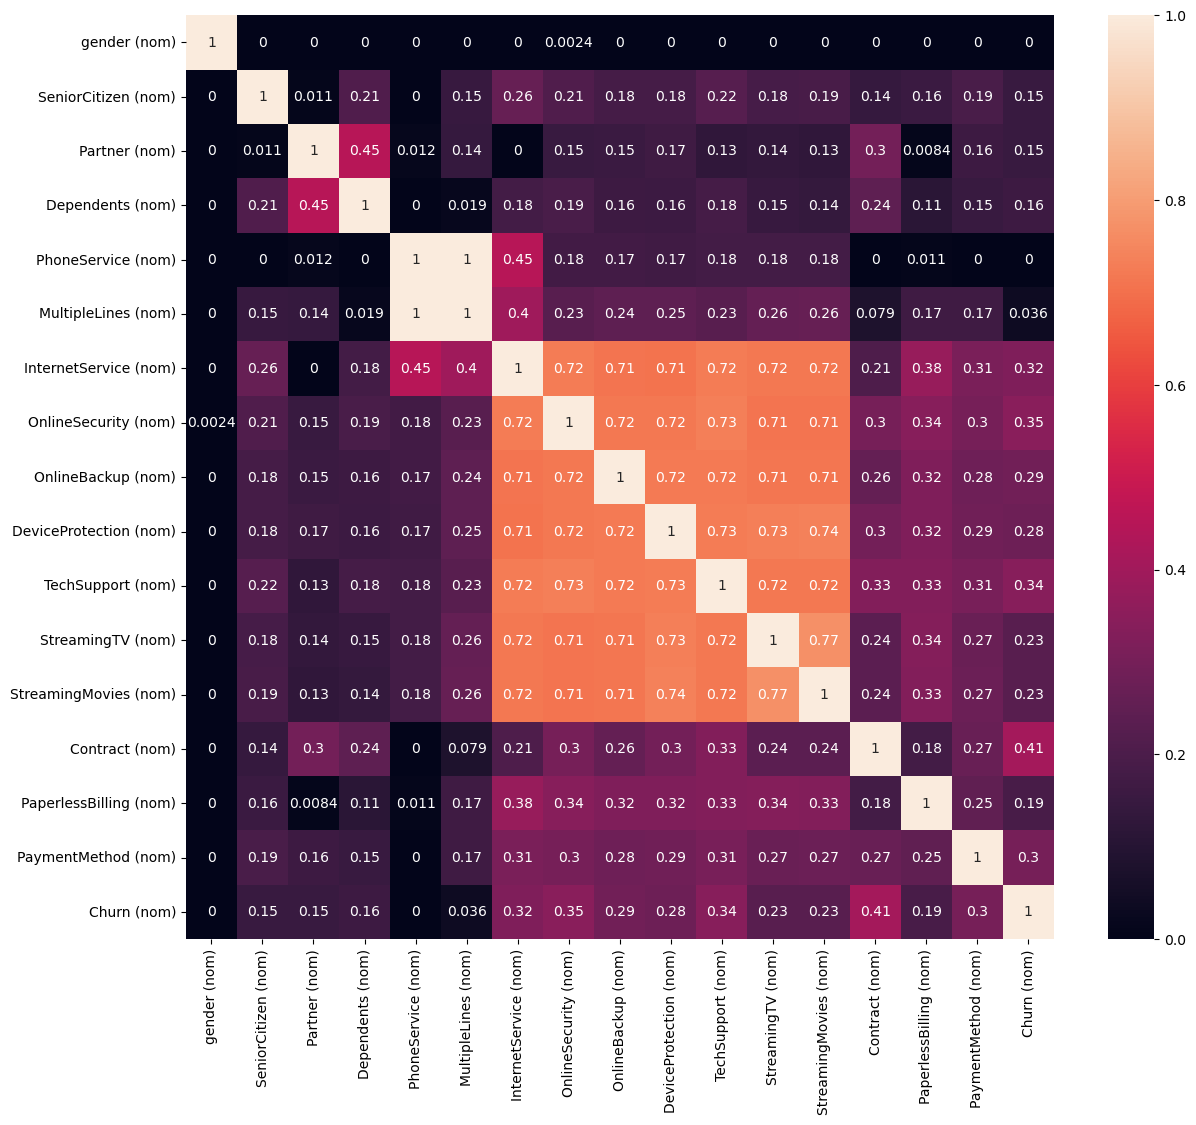

In [13]:
assoc = associations(df[cat_features], nominal_columns="auto", plot=False, mark_columns=True)
corr_matrix = assoc["corr"]

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True)

###### 7. Outlier check

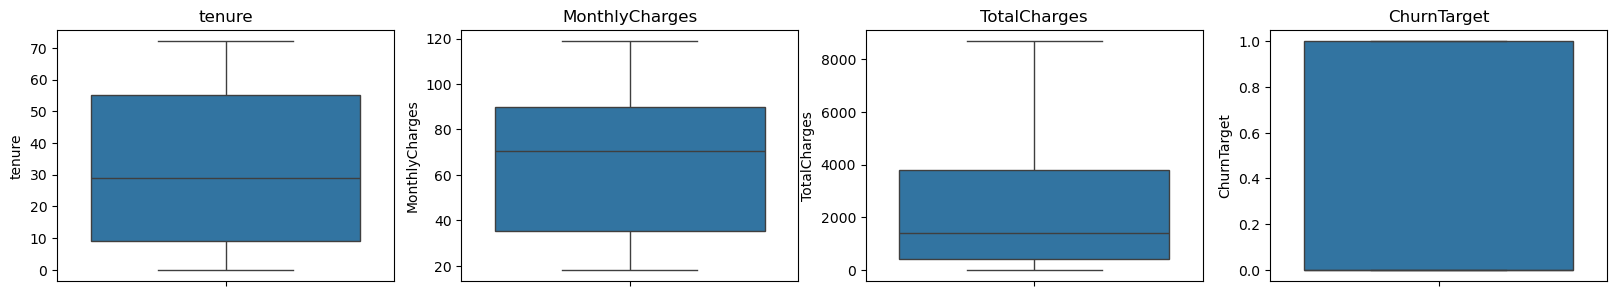

In [14]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.title(col)

no missing data or outliers

Feature Selection

###### for numerical features

In [15]:
target = "ChurnTarget"
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)
correlations = df[num_features].corrwith(df[target])
print(correlations)
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()
selected_num_features

tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.198324
dtype: float64


['tenure']

###### for categorical features

In [16]:
categorical_target = "Churn"
assoc = associations(df[cat_features], nominal_columns="all", plot=False)
corr_matrix = assoc["corr"]
print(corr_matrix.loc[categorical_target])
threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold].index.tolist()
del selected_cat_features[-1]
selected_cat_features

gender              0.000000
SeniorCitizen       0.149991
Partner             0.149663
Dependents          0.163448
PhoneService        0.000000
MultipleLines       0.036400
InternetService     0.322037
OnlineSecurity      0.347016
OnlineBackup        0.291850
DeviceProtection    0.281095
TechSupport         0.342526
StreamingTV         0.229902
StreamingMovies     0.230351
Contract            0.409798
PaperlessBilling    0.191141
PaymentMethod       0.302677
Churn               1.000000
Name: Churn, dtype: float64


['InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

In [17]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)
selected_features

['tenure',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

we have six features that would be used to develop the customer churn machine learning model

Building ML Model

let’s start with linear model Logistic Regression for the model development

###### 1. data splitting

In [23]:
target = "ChurnTarget"
X = df[selected_features]
y = df[target]

cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(include=["number"]).columns.tolist()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

###### 2. preprocessing and model training

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), cat_features),
        ("num", "passthrough", num_features)
])

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['tenure'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

###### 3. model evaluation

In [25]:
y_val_pred = pipeline.predict(X_val)
print("Validation Classifictation Report\n\n", classification_report(y_val, y_val_pred))

Validation Classifictation Report

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [26]:
y_test_pred = pipeline.predict(X_test)
print("Test Classifictation Report\n\n", classification_report(y_test, y_test_pred))

Test Classifictation Report

               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



###### 4. model optimization

In [27]:
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

param_grid = {
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__solver": ["lbfgs", "liblinear"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="recall")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['InternetService',
                                                                          'OnlineSecurity',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaymentMethod']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['tenure'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             scoring='recall')

In [28]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'classifier__C': 1, 'classifier__solver': 'lbfgs'}


In [29]:
y_val_pred = grid_search.predict(X_val)
print("Validation classification result:\n\n", classification_report(y_val, y_val_pred))

Validation classification result:

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [30]:
y_test_pred = grid_search.predict(X_test)
print("Test classification report:\n\n", classification_report(y_test, y_test_pred))

Test classification result:

               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

